In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
from sklearn import neighbors
from sklearn.model_selection import train_test_split
from numpy import loadtxt
from numpy import sort
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from xgboost import XGBRegressor
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import f1_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
import bokeh
import sklearn
import xgboost as xgb
import numpy as np
from scipy.stats import norm
import pandas as pd
import matplotlib.mlab as mlab
import sqlite3
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import neighbors
from sklearn.model_selection import train_test_split
from numpy import loadtxt
from numpy import sort
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from xgboost import XGBRegressor
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import f1_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
import bokeh
import sklearn
import xgboost as xgb
import numpy as np
from scipy.stats import norm
import pandas as pd
import matplotlib.mlab as mlab
import sqlite3
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns

#import packages
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import time 
import datetime
import collections
# from plotnine import *
import seaborn as sns
import scipy.stats as stats

from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import mean_absolute_error

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge 
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
import pandas as pd


import xgboost as xgb
import lightgbm as lgb

In [3]:
from sklearn.ensemble import RandomForestRegressor
import pandas as pd


import xgboost as xgb
import lightgbm as lgb

In [4]:
zillow = pd.read_csv('/content/drive/MyDrive/SWE project/DataStorage/dataBeforeFeatureEngineering.csv')

In [11]:
zillow.shape

(69047, 33)

In [42]:
y = zillow['logerror']

In [43]:
y.shape

(69047,)

In [6]:
X = zillow.copy()

In [12]:
X.shape

(69047, 32)

In [10]:
import pylab
import calendar
import numpy as np
import pandas as pd
import seaborn as sn
from scipy import stats
import missingno as msno
from datetime import datetime
import matplotlib
import matplotlib.pyplot as plt
from scipy.stats import kendalltau
import warnings
matplotlib.style.use('ggplot')
pd.options.mode.chained_assignment = None
warnings.filterwarnings("ignore")
%matplotlib inline

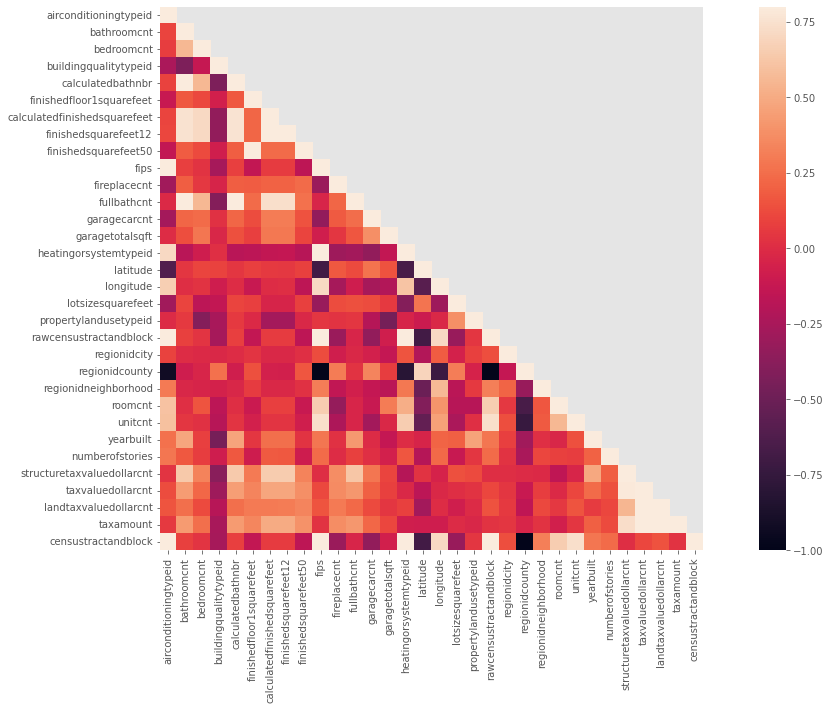

In [13]:

corrmatt = X.corr()
mask = np.array(corrmatt)
mask[np.tril_indices_from(mask)] = False
fig, ax = plt.subplots()
fig.set_size_inches(20, 10)
sn.heatmap(corrmatt, mask=mask, vmax = 0.8, square = True)

[Text(0, 0.5, 'Features'),
 Text(0.5, 0, 'VIF Scores'),
 Text(0.5, 1.0, 'Variables Which Exhibit Multicollinearity')]

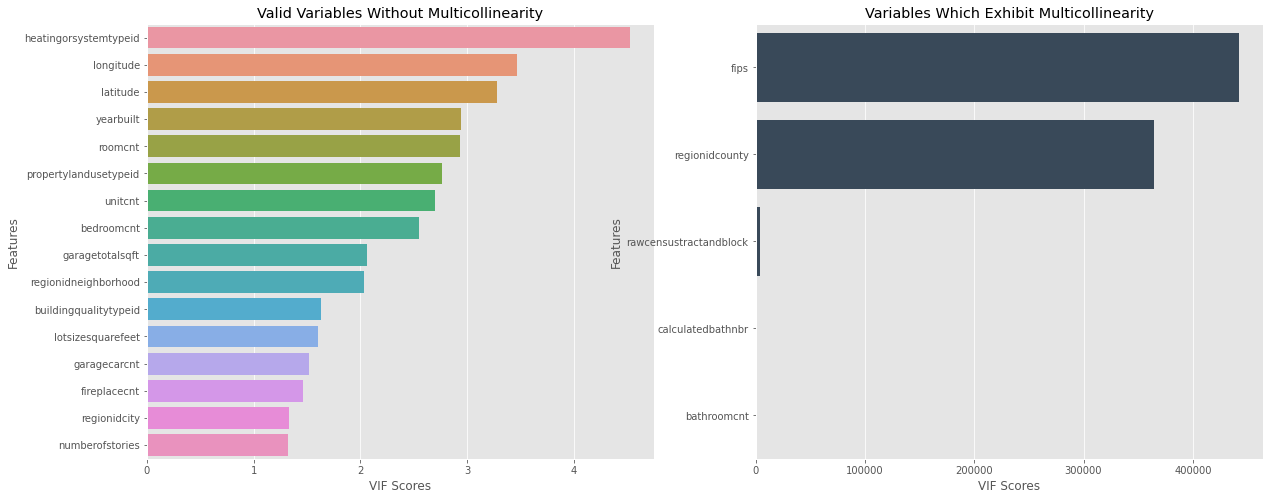

In [14]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import warnings
warnings.filterwarnings('ignore')

def calculate_vif_(x):
    variables = list(x.columns)
    vif = {variable:variance_inflation_factor(exog=x.values, exog_idx=ix) for ix, variable in enumerate(list(x.columns))}
    return vif

vifdict = calculate_vif_(X)

vifdf = pd.DataFrame()
vifdf['variables'] = vifdict.keys()
vifdf['vifscore'] = vifdict.values()
vifdf.sort_values(by = ['vifscore'], ascending=False, inplace = True)
validvariables = vifdf[vifdf['vifscore']<=5]
variableswithmc = vifdf[vifdf['vifscore']>5]

fig, (ax1, ax2) = plt.subplots(ncols = 2)
fig.set_size_inches(20, 8)
sn.barplot(data = validvariables, x='vifscore', y='variables', ax=ax1, orient='h')
sn.barplot(data=variableswithmc.head(5),x="vifscore",y="variables",ax=ax2,orient="h",color="#34495e")
ax1.set(xlabel='VIF Scores', ylabel='Features',title="Valid Variables Without Multicollinearity")
ax2.set(xlabel='VIF Scores', ylabel='Features',title="Variables Which Exhibit Multicollinearity")

In [15]:
X.columns

Index(['airconditioningtypeid', 'bathroomcnt', 'bedroomcnt',
       'buildingqualitytypeid', 'calculatedbathnbr',
       'finishedfloor1squarefeet', 'calculatedfinishedsquarefeet',
       'finishedsquarefeet12', 'finishedsquarefeet50', 'fips', 'fireplacecnt',
       'fullbathcnt', 'garagecarcnt', 'garagetotalsqft',
       'heatingorsystemtypeid', 'latitude', 'longitude', 'lotsizesquarefeet',
       'propertylandusetypeid', 'rawcensustractandblock', 'regionidcity',
       'regionidcounty', 'regionidneighborhood', 'roomcnt', 'unitcnt',
       'yearbuilt', 'numberofstories', 'structuretaxvaluedollarcnt',
       'taxvaluedollarcnt', 'landtaxvaluedollarcnt', 'taxamount',
       'censustractandblock'],
      dtype='object')

we need to delete the featue very large one in the right graph

In [16]:
X.drop(['fips','regionidcounty','rawcensustractandblock'],axis = 1,inplace = True)

In [17]:
X.shape

(69047, 29)

In [18]:
New = X.copy()

[Text(0, 0.5, 'Features'),
 Text(0.5, 0, 'VIF Scores'),
 Text(0.5, 1.0, 'Variables Which Exhibit Multicollinearity')]

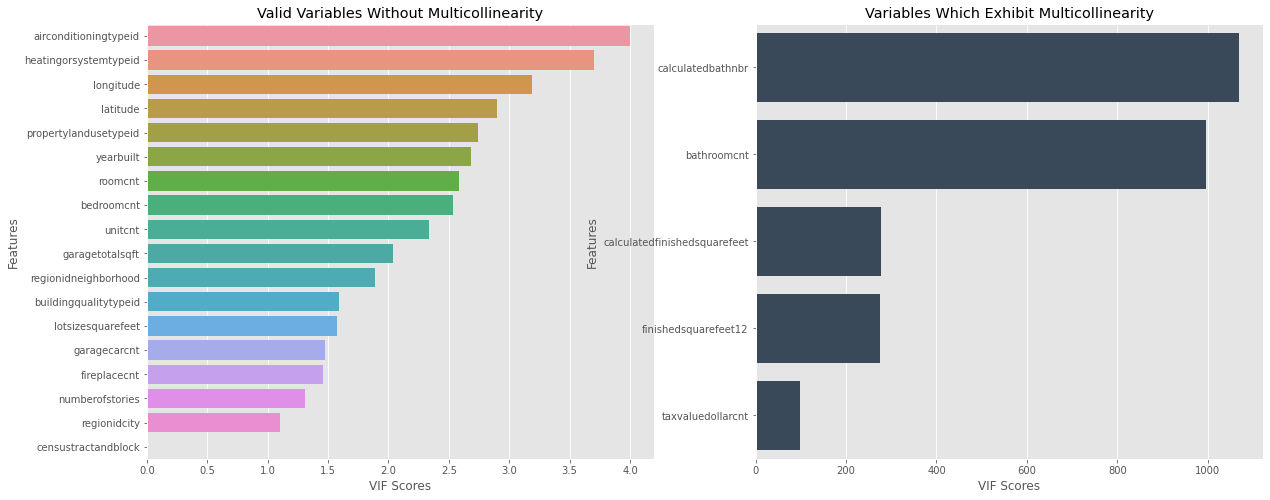

In [19]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import warnings
warnings.filterwarnings('ignore')

def calculate_vif_(x):
    variables = list(x.columns)
    vif = {variable:variance_inflation_factor(exog=x.values, exog_idx=ix) for ix, variable in enumerate(list(x.columns))}
    return vif

vifdict = calculate_vif_(New)

vifdf = pd.DataFrame()
vifdf['variables'] = vifdict.keys()
vifdf['vifscore'] = vifdict.values()
vifdf.sort_values(by = ['vifscore'], ascending=False, inplace = True)
validvariables = vifdf[vifdf['vifscore']<=5]
variableswithmc = vifdf[vifdf['vifscore']>5]

fig, (ax1, ax2) = plt.subplots(ncols = 2)
fig.set_size_inches(20, 8)
sn.barplot(data = validvariables, x='vifscore', y='variables', ax=ax1, orient='h')
sn.barplot(data=variableswithmc.head(5),x="vifscore",y="variables",ax=ax2,orient="h",color="#34495e")
ax1.set(xlabel='VIF Scores', ylabel='Features',title="Valid Variables Without Multicollinearity")
ax2.set(xlabel='VIF Scores', ylabel='Features',title="Variables Which Exhibit Multicollinearity")

Delte the first  one in the right 

In [20]:
New.drop(['calculatedfinishedsquarefeet'],axis = 1,inplace = True)

In [21]:
New.shape

(69047, 28)

[Text(0, 0.5, 'Features'),
 Text(0.5, 0, 'VIF Scores'),
 Text(0.5, 1.0, 'Variables Which Exhibit Multicollinearity')]

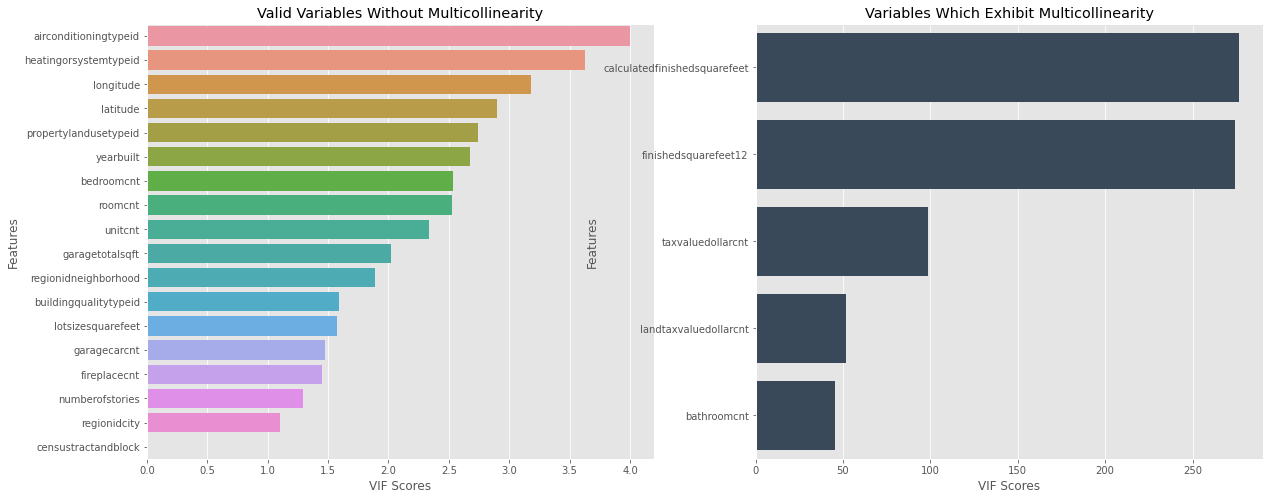

In [22]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import warnings
warnings.filterwarnings('ignore')

def calculate_vif_(x):
    variables = list(x.columns)
    vif = {variable:variance_inflation_factor(exog=x.values, exog_idx=ix) for ix, variable in enumerate(list(x.columns))}
    return vif

vifdict = calculate_vif_(New)

vifdf = pd.DataFrame()
vifdf['variables'] = vifdict.keys()
vifdf['vifscore'] = vifdict.values()
vifdf.sort_values(by = ['vifscore'], ascending=False, inplace = True)
validvariables = vifdf[vifdf['vifscore']<=5]
variableswithmc = vifdf[vifdf['vifscore']>5]

fig, (ax1, ax2) = plt.subplots(ncols = 2)
fig.set_size_inches(20, 8)
sn.barplot(data = validvariables, x='vifscore', y='variables', ax=ax1, orient='h')
sn.barplot(data=variableswithmc.head(5),x="vifscore",y="variables",ax=ax2,orient="h",color="#34495e")
ax1.set(xlabel='VIF Scores', ylabel='Features',title="Valid Variables Without Multicollinearity")
ax2.set(xlabel='VIF Scores', ylabel='Features',title="Variables Which Exhibit Multicollinearity")

Delte top 

In [23]:
New.drop(['calculatedfinishedsquarefeet'],axis = 1,inplace = True)

In [24]:
New.shape

(69047, 27)

[Text(0, 0.5, 'Features'),
 Text(0.5, 0, 'VIF Scores'),
 Text(0.5, 1.0, 'Variables Which Exhibit Multicollinearity')]

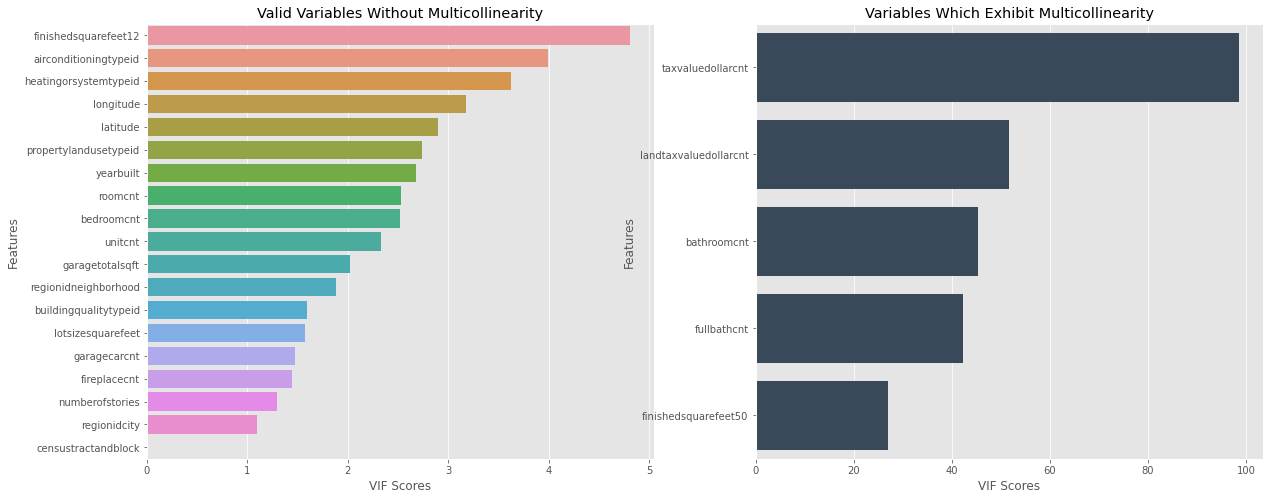

In [25]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import warnings
warnings.filterwarnings('ignore')

def calculate_vif_(x):
    variables = list(x.columns)
    vif = {variable:variance_inflation_factor(exog=x.values, exog_idx=ix) for ix, variable in enumerate(list(x.columns))}
    return vif

vifdict = calculate_vif_(New)

vifdf = pd.DataFrame()
vifdf['variables'] = vifdict.keys()
vifdf['vifscore'] = vifdict.values()
vifdf.sort_values(by = ['vifscore'], ascending=False, inplace = True)
validvariables = vifdf[vifdf['vifscore']<=5]
variableswithmc = vifdf[vifdf['vifscore']>5]

fig, (ax1, ax2) = plt.subplots(ncols = 2)
fig.set_size_inches(20, 8)
sn.barplot(data = validvariables, x='vifscore', y='variables', ax=ax1, orient='h')
sn.barplot(data=variableswithmc.head(5),x="vifscore",y="variables",ax=ax2,orient="h",color="#34495e")
ax1.set(xlabel='VIF Scores', ylabel='Features',title="Valid Variables Without Multicollinearity")
ax2.set(xlabel='VIF Scores', ylabel='Features',title="Variables Which Exhibit Multicollinearity")

In [26]:
New.columns

Index(['airconditioningtypeid', 'bathroomcnt', 'bedroomcnt',
       'buildingqualitytypeid', 'finishedfloor1squarefeet',
       'finishedsquarefeet12', 'finishedsquarefeet50', 'fireplacecnt',
       'fullbathcnt', 'garagecarcnt', 'garagetotalsqft',
       'heatingorsystemtypeid', 'latitude', 'longitude', 'lotsizesquarefeet',
       'propertylandusetypeid', 'regionidcity', 'regionidneighborhood',
       'roomcnt', 'unitcnt', 'yearbuilt', 'numberofstories',
       'structuretaxvaluedollarcnt', 'taxvaluedollarcnt',
       'landtaxvaluedollarcnt', 'taxamount', 'censustractandblock'],
      dtype='object')

Delting the most VIF value

In [27]:
New.drop(['taxvaluedollarcnt'],axis = 1,inplace = True)

In [28]:
New.shape

(69047, 26)

[Text(0, 0.5, 'Features'),
 Text(0.5, 0, 'VIF Scores'),
 Text(0.5, 1.0, 'Variables Which Exhibit Multicollinearity')]

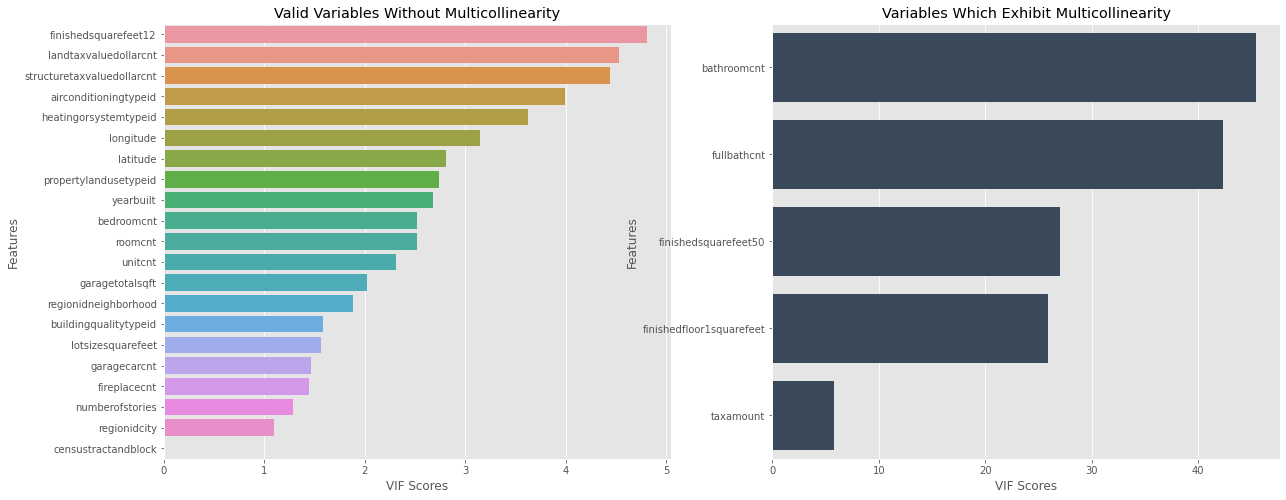

In [29]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import warnings
warnings.filterwarnings('ignore')

def calculate_vif_(x):
    variables = list(x.columns)
    vif = {variable:variance_inflation_factor(exog=x.values, exog_idx=ix) for ix, variable in enumerate(list(x.columns))}
    return vif

vifdict = calculate_vif_(New)

vifdf = pd.DataFrame()
vifdf['variables'] = vifdict.keys()
vifdf['vifscore'] = vifdict.values()
vifdf.sort_values(by = ['vifscore'], ascending=False, inplace = True)
validvariables = vifdf[vifdf['vifscore']<=5]
variableswithmc = vifdf[vifdf['vifscore']>5]

fig, (ax1, ax2) = plt.subplots(ncols = 2)
fig.set_size_inches(20, 8)
sn.barplot(data = validvariables, x='vifscore', y='variables', ax=ax1, orient='h')
sn.barplot(data=variableswithmc.head(5),x="vifscore",y="variables",ax=ax2,orient="h",color="#34495e")
ax1.set(xlabel='VIF Scores', ylabel='Features',title="Valid Variables Without Multicollinearity")
ax2.set(xlabel='VIF Scores', ylabel='Features',title="Variables Which Exhibit Multicollinearity")

In [30]:
NEW1 = New.copy()

In [31]:
NEW1.shape

(69047, 26)

In [32]:
NEW1.drop(['bathroomcnt'],axis = 1,inplace = True)

In [33]:
NEW1.shape

(69047, 25)

Run again and test

[Text(0, 0.5, 'Features'),
 Text(0.5, 0, 'VIF Scores'),
 Text(0.5, 1.0, 'Variables Which Exhibit Multicollinearity')]

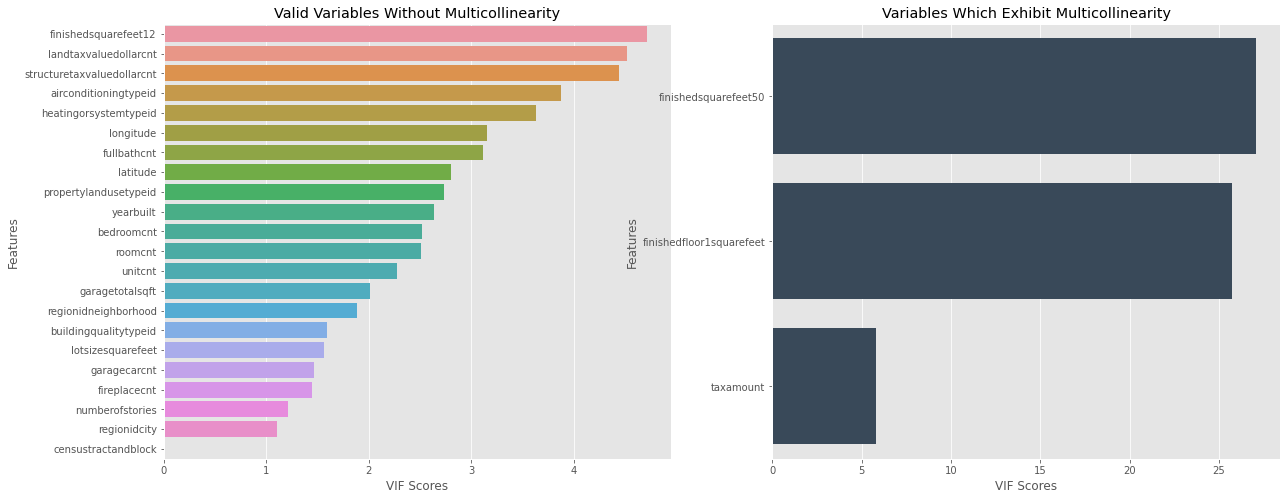

In [34]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import warnings
warnings.filterwarnings('ignore')

def calculate_vif_(x):
    variables = list(x.columns)
    vif = {variable:variance_inflation_factor(exog=x.values, exog_idx=ix) for ix, variable in enumerate(list(x.columns))}
    return vif

vifdict = calculate_vif_(NEW1)

vifdf = pd.DataFrame()
vifdf['variables'] = vifdict.keys()
vifdf['vifscore'] = vifdict.values()
vifdf.sort_values(by = ['vifscore'], ascending=False, inplace = True)
validvariables = vifdf[vifdf['vifscore']<=5]
variableswithmc = vifdf[vifdf['vifscore']>5]

fig, (ax1, ax2) = plt.subplots(ncols = 2)
fig.set_size_inches(20, 8)
sn.barplot(data = validvariables, x='vifscore', y='variables', ax=ax1, orient='h')
sn.barplot(data=variableswithmc.head(5),x="vifscore",y="variables",ax=ax2,orient="h",color="#34495e")
ax1.set(xlabel='VIF Scores', ylabel='Features',title="Valid Variables Without Multicollinearity")
ax2.set(xlabel='VIF Scores', ylabel='Features',title="Variables Which Exhibit Multicollinearity")

In [36]:
NEW1.columns

Index(['airconditioningtypeid', 'bedroomcnt', 'buildingqualitytypeid',
       'finishedfloor1squarefeet', 'finishedsquarefeet12',
       'finishedsquarefeet50', 'fireplacecnt', 'fullbathcnt', 'garagecarcnt',
       'garagetotalsqft', 'heatingorsystemtypeid', 'latitude', 'longitude',
       'lotsizesquarefeet', 'propertylandusetypeid', 'regionidcity',
       'regionidneighborhood', 'roomcnt', 'unitcnt', 'yearbuilt',
       'numberofstories', 'structuretaxvaluedollarcnt',
       'landtaxvaluedollarcnt', 'taxamount', 'censustractandblock'],
      dtype='object')

In [37]:
NEW1.drop(['finishedsquarefeet50'],axis = 1,inplace = True)

In [38]:
NEW1.shape

(69047, 24)

[Text(0, 0.5, 'Features'),
 Text(0.5, 0, 'VIF Scores'),
 Text(0.5, 1.0, 'Variables Which Exhibit Multicollinearity')]

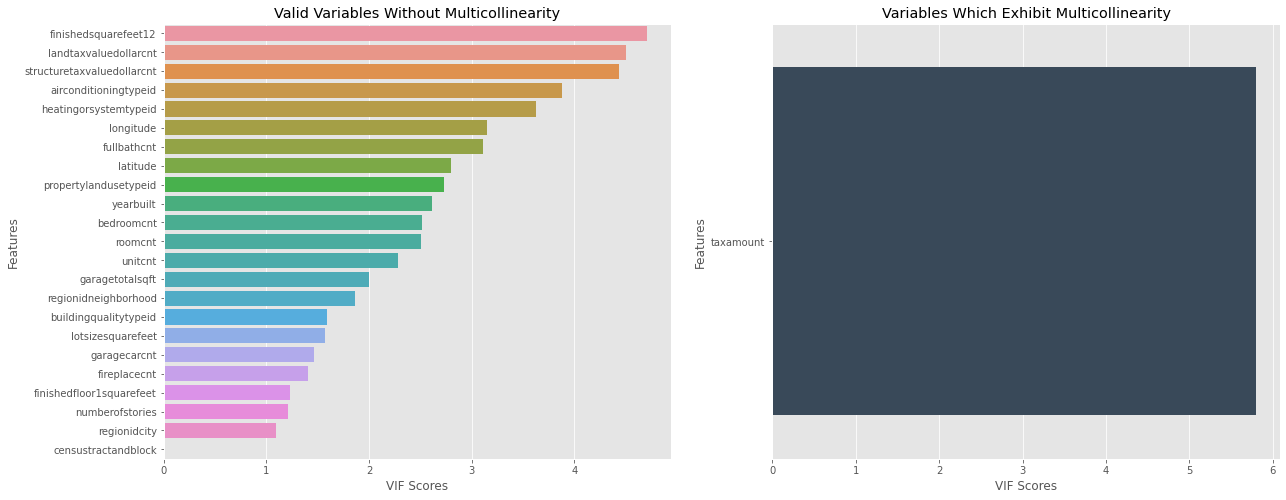

In [39]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import warnings
warnings.filterwarnings('ignore')

def calculate_vif_(x):
    variables = list(x.columns)
    vif = {variable:variance_inflation_factor(exog=x.values, exog_idx=ix) for ix, variable in enumerate(list(x.columns))}
    return vif

vifdict = calculate_vif_(NEW1)

vifdf = pd.DataFrame()
vifdf['variables'] = vifdict.keys()
vifdf['vifscore'] = vifdict.values()
vifdf.sort_values(by = ['vifscore'], ascending=False, inplace = True)
validvariables = vifdf[vifdf['vifscore']<=5]
variableswithmc = vifdf[vifdf['vifscore']>5]

fig, (ax1, ax2) = plt.subplots(ncols = 2)
fig.set_size_inches(20, 8)
sn.barplot(data = validvariables, x='vifscore', y='variables', ax=ax1, orient='h')
sn.barplot(data=variableswithmc.head(5),x="vifscore",y="variables",ax=ax2,orient="h",color="#34495e")
ax1.set(xlabel='VIF Scores', ylabel='Features',title="Valid Variables Without Multicollinearity")
ax2.set(xlabel='VIF Scores', ylabel='Features',title="Variables Which Exhibit Multicollinearity")

In [44]:
NEW1['logerror']= y

In [45]:
NEW1.shape

(69047, 25)

In [46]:
#we need to save data here
from google.colab import files
NEW1.to_csv('datawithLessVIF.csv') 
files.download('datawithLessVIF.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Ok now all the feature now is in the VIF < 10

Test again

Delte the top one and test

Run again